<a href="https://colab.research.google.com/github/saspav/python_for_pro/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green' size='6'>**–ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ä–∞–±–æ—Ç–∞ 2**</font>  
<font color='#11a642' size='5'>**–¢–µ–º–∞: –ú–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ**</font>  
<font size='5'>**–ó–∞–¥–∞–Ω–∏–µ:**</font>  


**–í–∞—à–∞ –∑–∞–¥–∞—á–∞** ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –ª–∏ –∫–ª–∏–µ–Ω—Ç —Å –∞–∫–∫–∞—É–Ω—Ç–æ–º –∏–ª–∏ –∑–∞–∫—Ä–æ–µ—Ç –µ–≥–æ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —É–π–¥—ë—Ç).

–¢—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—é:
- –†–∞–±–æ—Ç–∞ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∞ –≤ jupyter notebook (—Ñ–∞–π–ª *.ipynb)
- –†–∞–±–æ—Ç–∞ –¥–æ–ª–∂–Ω–∞ —Å–æ–¥–µ—Ä–∂–∞—Ç—å –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –∏ –≤—ã–≤–æ–¥—ã. –û–±—ä—è—Å–Ω—è–π—Ç–µ –ø–æ—á–µ–º—É –≤—ã –≤—ã–±—Ä–∞–ª–∏ –∏–º–µ–Ω–Ω–æ —ç—Ç–æ—Ç —Å–ø–æ—Å–æ–± –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö


–í—Å–µ–º —É–¥–∞—á–∏!





# <font color='#11a642' size='6'> **–ò–º–ø–æ—Ä—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# <font color='#11a642' size='6'> **–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö**

In [2]:
try:
    url = 'https://drive.google.com/uc?id=1wvqGslWLauKyZxLY-d3RQCTyHCb5wJCO'
    df = pd.read_csv(url)
except:
    df = pd.read_csv('train.csv')

In [3]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
# –ö–æ–ª–æ–Ω–∫–∞ "id" –Ω–µ –Ω–µ—Å–µ—Ç —Å–º—ã—Å–ª–∞ - —ç—Ç–æ –∏–Ω–¥–µ–∫—Å
df.set_index("id", inplace=True)

In [5]:
# 2. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
X = df.drop('Exited', axis=1)
y = df[['Exited']]

In [6]:
y.head()

Exited
id        
0        0
1        0
2        0
3        0
4        0

## <font color='#11a642' size='5'> –ù–∞–ø–∏—à–∏—Ç–µ –æ—Ç–≤–µ—Ç—ã –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã: </font>


1.   –ö –∫–∞–∫–æ–º—É —Ç–∏–ø—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –æ—Ç–Ω–æ—Å–∏—Ç—Å—è —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫?
2.   –ö–∞–∫—É—é –∑–∞–¥–∞—á—É –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç —Ä–µ—à–∏—Ç—å, —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è?

In [7]:
y.value_counts()

Exited
0         130113
1          34921
Name: count, dtype: int64

# –≤–∞—à –æ—Ç–≤–µ—Ç
1. –í —Ü–µ–ª–µ–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–µ —Ç–æ–ª—å–∫–æ 2 —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è.
2. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º—ã –±—É–¥–µ–º —Ä–µ—à–∞—Ç—å –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

# <font color='#11a642' size='6'> **–†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö**

## <font color='#11a642' size='5'> –û—Ü–µ–Ω–∏—Ç–µ —Ä–∞–∑–º–µ—Ä –≤–∞—à–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞  </font>



1.   –°–∫–æ–ª—å–∫–æ –ì–ë –≤–∞—à –¥–∞—Ç–∞—Å–µ—Ç
2.   –°–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤



In [8]:
# –°–∫–æ–ª—å–∫–æ –ì–ë –≤–∞—à –¥–∞—Ç–∞—Å–µ—Ç
df.memory_usage(deep=True).sum() / 1024 ** 3

np.float64(0.04248335398733616)

In [9]:
# –°–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤
df.shape

(165034, 13)

In [10]:
# –î—É–±–ª–∏–∫–∞—Ç–æ–≤ –Ω–µ—Ç

df.duplicated().sum()

np.int64(0)

## <font color='#11a642' size='5'> –ê–Ω–∞–ª–∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö (–Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö) –ø—Ä–∏–∑–Ω–∞–∫–æ–≤


- –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–∏–Ω–∏–º—É–º, –º–∞–∫—Å–∏–º—É–º, —Å—Ä–µ–¥–Ω–µ–µ, –º–µ–¥–∏–∞–Ω—É

In [11]:
# –í—ã–±–∏—Ä–∞–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏
num_cols = X.select_dtypes(include=['number']).columns.tolist()
# –°—á–∏—Ç–∞–µ–º —Ç—Ä–µ–±—É–µ–º—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
X[num_cols].agg(['min', 'max', 'mean', 'median']).T

min          max          mean      median
CustomerId       15565701.00  15815690.00  1.569201e+07  15690169.0
CreditScore           350.00       850.00  6.564544e+02       659.0
Age                    18.00        92.00  3.812589e+01        37.0
Tenure                  0.00        10.00  5.020353e+00         5.0
Balance                 0.00    250898.09  5.547809e+04         0.0
NumOfProducts           1.00         4.00  1.554455e+00         2.0
HasCrCard               0.00         1.00  7.539537e-01         1.0
IsActiveMember          0.00         1.00  4.977702e-01         0.0
EstimatedSalary        11.58    199992.48  1.125748e+05    117948.0

In [12]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

df.CustomerId.value_counts()

CustomerId
15682355    121
15570194     99
15585835     98
15595588     91
15648067     90
           ... 
15744577      1
15596817      1
15731021      1
15706905      1
15791647      1
Name: count, Length: 23221, dtype: int64

–£ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ–¥ —Å–æ—Ç–Ω—é –∞–∫–∫–∞—É–Ω—Ç–æ–≤.

–ö–æ–ª–æ–Ω–∫–∞ "CustomerId" –Ω–µ –Ω–µ—Å–µ—Ç —Å–º—ã—Å–ª–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏ - —ç—Ç–æ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, —É–±–µ—Ä–µ–º –µ–≥–æ –∏–∑ –æ–±—É—á–µ–Ω–∏—è.

In [13]:
num_cols.remove('CustomerId')
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

## <font color='#11a642' size='5'> –ê–Ω–∞–ª–∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤


- –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–æ–¥—É, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [14]:
# –í—ã–±–∏—Ä–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ (–≤–∫–ª—é—á–∞—è —Å—Ç—Ä–æ–∫–∏ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
X[cat_cols].agg([lambda z: z.mode().tolist()[0], 'nunique']).T.rename(columns={'<lambda>': 'mode'})

mode nunique
Surname      Hsia    2797
Geography  France       3
Gender       Male       2

In [15]:
# –ö–æ–ª–æ–Ω–∫–∞ "Surname" –Ω–µ –Ω–µ—Å–µ—Ç —Å–º—ã—Å–ª–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏, —Ç.–∫. —ç—Ç–æ –∏–º—è
# —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —É–±–µ—Ä–µ–º –µ—ë –∏–∑ –æ–±—É—á–µ–Ω–∏—è

cat_cols.remove('Surname')
cat_cols

['Geography', 'Gender']

## <font color='#11a642' size='5'> –ê–Ω–∞–ª–∏–∑ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞


- –∫–∞–∫–∞—è –¥–æ–ª—è 1?

In [16]:
y.value_counts(normalize=True)[1] * 100

np.float64(21.159882206090867)

# <font color='#11a642' size='6'> **–†–∞–∑–¥–µ–ª–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç**

- –Ω—É–∂–Ω–∞ –ª–∏ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è?

In [17]:
# –¢.–∫. —É –Ω–∞—Å –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤: –∫–ª–∞—Å—Å —Å –º–µ—Ç–∫–æ–π "1" –≤—Å–µ–≥–æ 21%
# –ë—É–¥–µ–º –¥–µ–ª–∏—Ç—å —Å–æ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–µ–π

train, valid, X_train, X_valid, y_train, y_valid = train_test_split(df, X, y,
                                                                    test_size=0.2,
                                                                    stratify=y,
                                                                    random_state=127)

# <font color='#11a642' size='6'> **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∫ –æ–±—É—á–µ–Ω–∏—é**

## –ü–æ–∏—Å–∫ –∏ –∞–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤

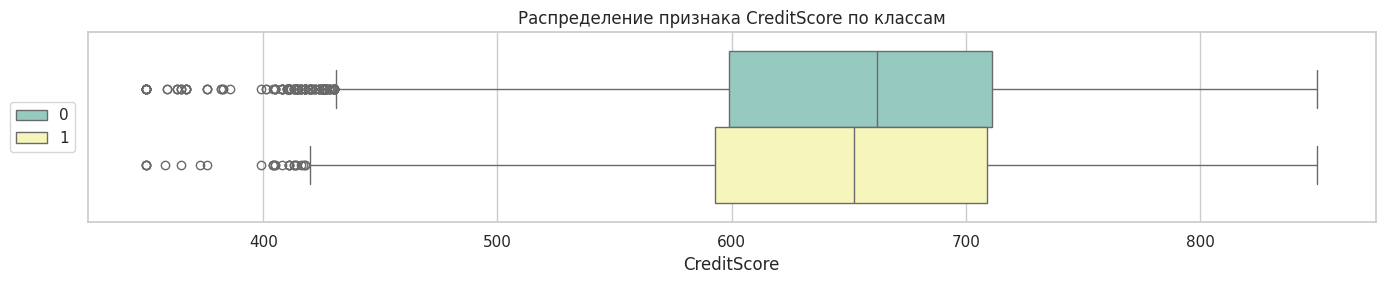

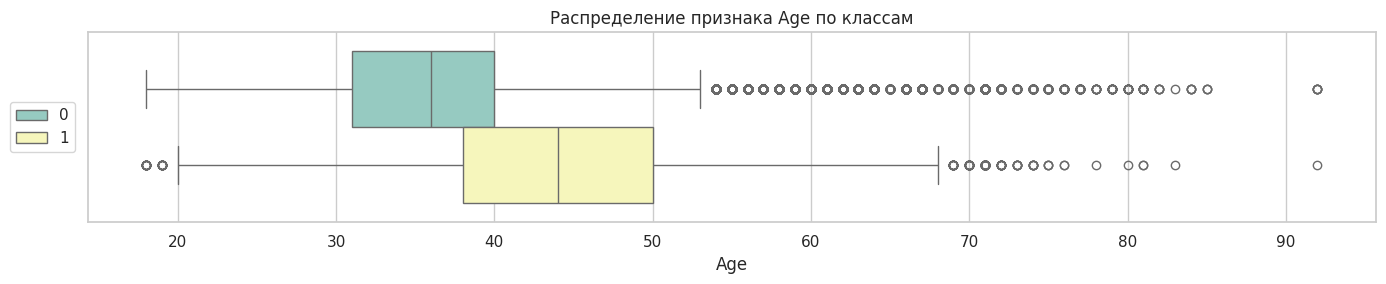

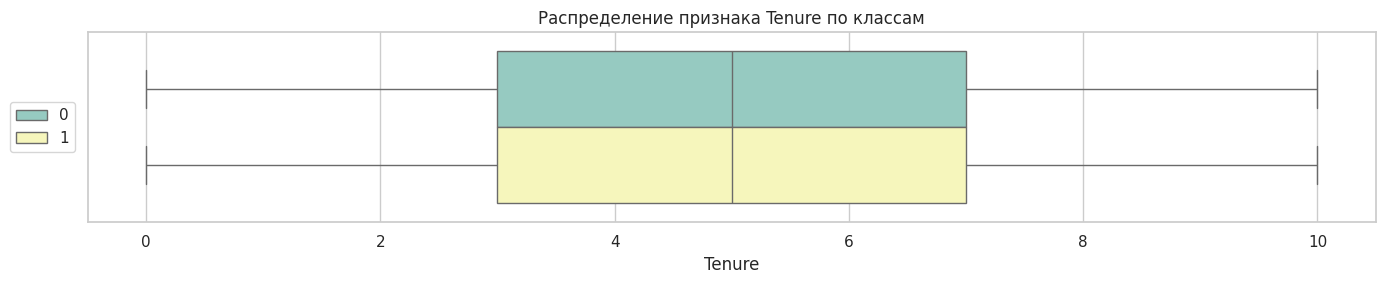

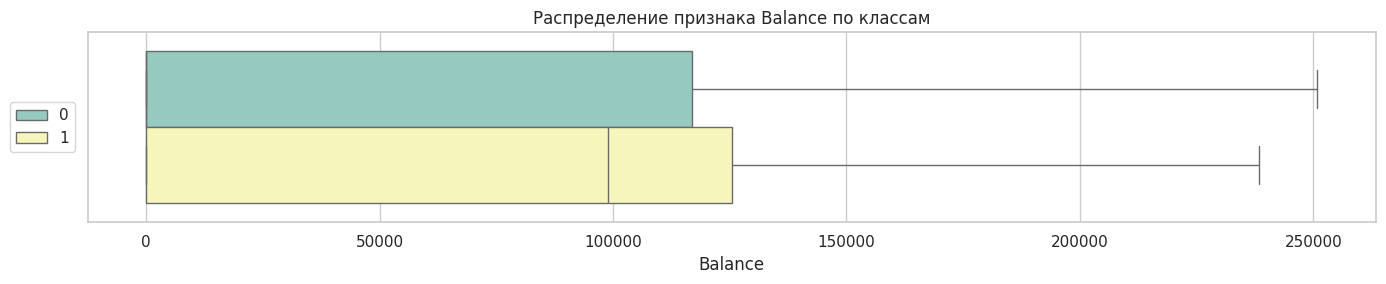

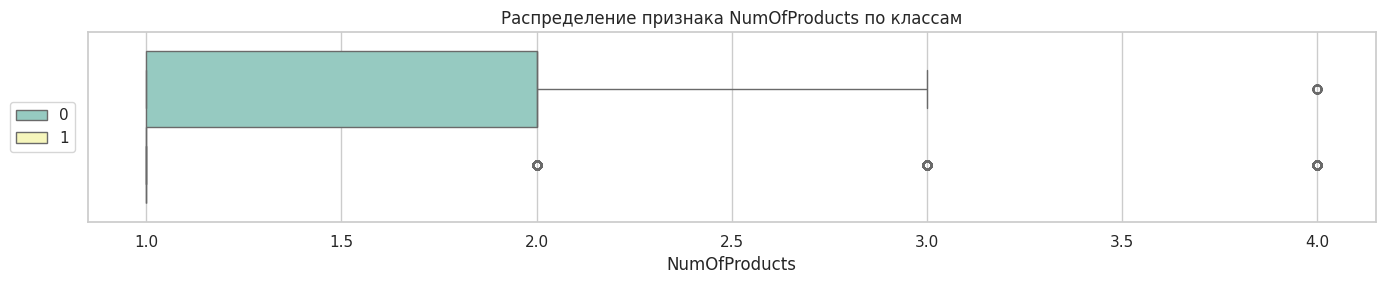

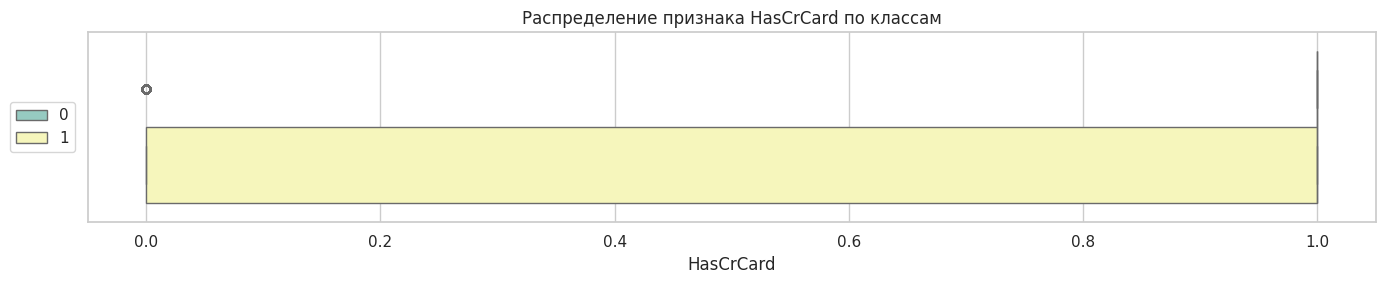

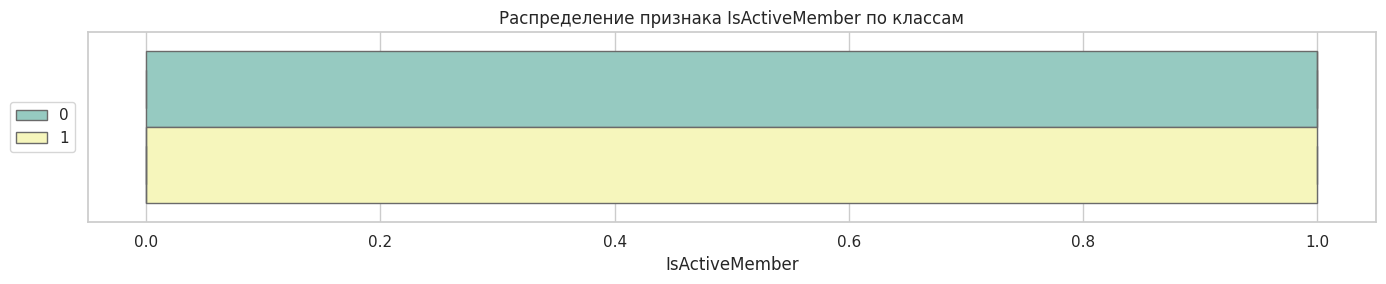

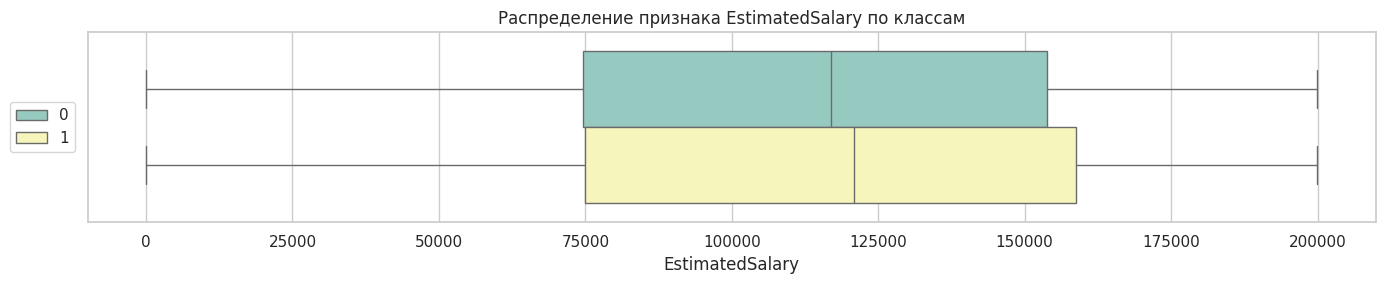

In [18]:
sns.set(style='whitegrid')

for col in num_cols:
    plt.figure(figsize=(14, 3))
    sns.boxplot(data=train, x=col, hue='Exited', palette='Set3', legend=True)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ {col} –ø–æ –∫–ª–∞—Å—Å–∞–º')
    # –ü–µ—Ä–µ–º–µ—â–∞–µ–º –ª–µ–≥–µ–Ω–¥—É –≤ –ª–µ–≤—É—é —á–∞—Å—Ç—å –∏ —Ü–µ–Ω—Ç—Ä–∏—Ä—É–µ–º –ø–æ –≤—ã—Å–æ—Ç–µ
    plt.legend(bbox_to_anchor=(-0.01, 0.5), loc='center right', borderaxespad=0)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [19]:
# –ü–æ–∏—Å–∫ –≤—ã–±—Ä–æ—Å–æ–≤ —Å –ø–æ–º–æ—â—å—é IQR, –Ω–æ –≤–æ–∑—å–º–µ—Ç 2 IQR –∫–∞–∫ –±–æ–ª–µ–µ —â–∞–¥—è—â—É—é –≥—Ä–∞–Ω–∏—Ü—É

Q1 = X_train[num_cols].quantile(0.25)
Q3 = X_train[num_cols].quantile(0.75)
IQR = Q3 - Q1

# –°–æ–∑–¥–∞—ë–º DataFrame —Å —Ñ–ª–∞–≥–∞–º–∏ –≤—ã–±—Ä–æ—Å–æ–≤ (True/False)
outlier_flags_train = (X_train[num_cols] < (Q1 - 2 * IQR)) | (X_train[num_cols] > (Q3 + 2 * IQR))

# –ü—Ä–∏–º–µ—Ä: –≤—ã–≤–µ—Å—Ç–∏ % –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –∫–æ–ª–æ–Ω–∫–∞–º
outlier_percent = outlier_flags_train.mean().sort_values(ascending=False)
print("–ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:")
outlier_percent

–ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:


HasCrCard          0.246397
Age                0.016701
CreditScore        0.000235
Tenure             0.000000
Balance            0.000000
NumOfProducts      0.000000
IsActiveMember     0.000000
EstimatedSalary    0.000000
dtype: float64

In [20]:
# HasCrCard - —ç—Ç–æ –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤ –Ω–µ–º –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã–±—Ä–æ—Å–æ–≤,
# —É–¥–∞–ª–∏–º –≤—ã–±—Ä–æ—Å—ã –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Age –∏ CreditScore –∏ —Å–æ—Ö—Ä–∞–Ω–∏–º –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π –î–§ –¥–ª—è –æ–ø—ã—Ç–æ–≤

X_train_out = X_train[~outlier_flags_train[['Age', 'CreditScore']].any(axis=1)]
y_train_out = y_train[~outlier_flags_train[['Age', 'CreditScore']].any(axis=1)]
X_valid_out = X_valid.copy()

# –°–¥–µ–ª–∞–º –∏–∑ –£ —Å–µ—Ä–∏—é
y_valid = y_valid['Exited']
y_train = y_train['Exited']
y_train_out = y_train_out['Exited']

X_train_out.shape

(129791, 12)

## –ê–Ω–∞–ª–∏–∑ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [21]:
X_train.isna().sum()

CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
dtype: float64

In [22]:
# –ù–∞ –≤—Å–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ

df.isna().sum()

CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

#### –ù–∞–º –ø–æ–≤–µ–∑–ª–æ: –¥–∞—Ç–∞—Å–µ—Ç –Ω–µ –∏–º–µ–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤!

## –ê–Ω–∞–ª–∏–∑ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

In [23]:
# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_valid_encoded = encoder.transform(X_valid[cat_cols])

# –ü–æ–ª—É—á–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –Ω–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
enc_col_names = encoder.get_feature_names_out(cat_cols)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=enc_col_names, index=X_train.index)
X_valid_encoded_df = pd.DataFrame(X_valid_encoded, columns=enc_col_names, index=X_valid.index)

## –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [24]:
# –¢.–∫. —É –Ω–∞—Å –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã, –ø–æ–ø—Ä–æ–±—É–µ–º RobustScaler, –∫–∞–∫ –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤—ã–π –∫ –≤—ã–±—Ä–æ—Å–∞–º


# scaler = StandardScaler()
scaler = RobustScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_valid[num_cols] = scaler.transform(X_valid[num_cols])

# –î–æ–±–∞–≤–ª—è–µ–º –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
X_train = pd.concat([X_train[num_cols], X_train_encoded_df], axis=1)
X_valid = pd.concat([X_valid[num_cols], X_valid_encoded_df], axis=1)

print("–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è:")
print(f"X_train: {X_train.shape}, X_test: {X_valid.shape}")

–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è:
X_train: (132027, 11), X_test: (33007, 11)


# <font color='#11a642' size='6'> **–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è**

In [25]:
def find_optimal_threshold(y_true, y_proba):
    # –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ—Ä–æ–≥–∞
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    # –í—ã—á–∏—Å–ª—è–µ–º F1-score –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ—Ä–æ–≥–∞
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    # –ù–∞—Ö–æ–¥–∏–º –ø–æ—Ä–æ–≥ —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º F1
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold


def show_roc_auc(model):
    # –ü–æ–ª—É—á–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_valid_proba = model.predict_proba(X_valid)[:, 1]

    # –ü–æ–¥–±–∏—Ä–∞–µ–º –ø–æ—Ä–æ–≥ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
    optimal_threshold = find_optimal_threshold(y_valid, y_valid_proba)
    print(f"–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥: {optimal_threshold:.4f}")
    # –ü—Ä–∏–º–µ–Ω—è–µ–º –ø–æ—Ä–æ–≥ –∫ –æ–±–µ–∏–º –≤—ã–±–æ—Ä–∫–∞–º
    y_train_pred = (y_train_proba >= optimal_threshold).astype(int)
    y_valid_pred = (y_valid_proba >= optimal_threshold).astype(int)

    # ROC-–∫—Ä–∏–≤–∞—è + AUC
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_proba)
    # roc_auc_score
    auc_train = roc_auc_score(y_train, y_train_proba)
    auc_valid = roc_auc_score(y_valid, y_valid_proba)
    # –†–∞—Å—á—ë—Ç F1-score
    f1_train = f1_score(y_train, y_train_pred)
    f1_valid = f1_score(y_valid, y_valid_pred)
    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ ROC-–≥—Ä–∞—Ñ–∏–∫–∞
    plt.figure(figsize=(12, 8))
    plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.5f})", color="blue")
    plt.plot(fpr_valid, tpr_valid, label=f"Valid ROC (AUC = {auc_valid:.5f})", color="green")
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-–∫—Ä–∏–≤–∞—è: Train vs Valid")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    return f1_train, f1_valid, auc_train, auc_valid

## <font color='#11a642' size='5'> –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥: 0.3196


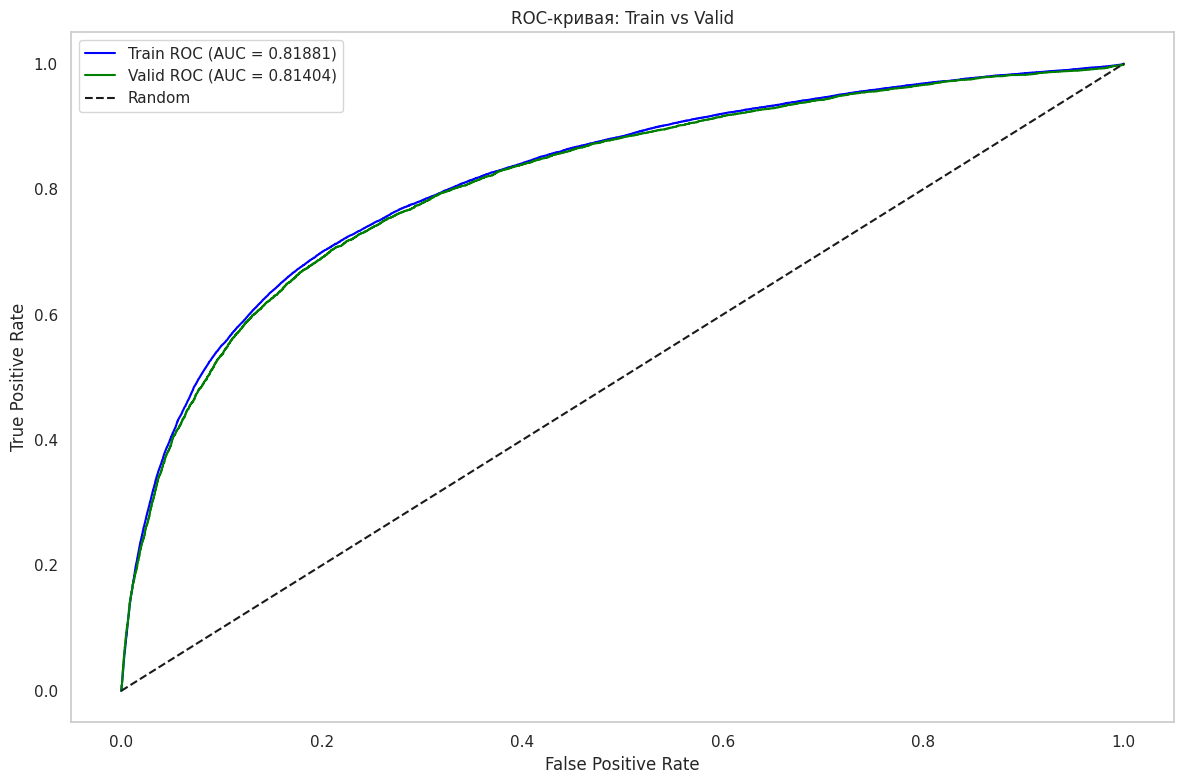

In [26]:
# –û–±—É—á–µ–Ω–∏–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
logreg1 = LogisticRegression(max_iter=1000, random_state=127)
logreg1.fit(X_train, y_train)

res1 = show_roc_auc(logreg1)

## <font color='#11a642' size='5'> –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π
> –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), –Ω–∞—Å—Ç—Ä–æ–∏–≤ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã penalty –∏ C

In [27]:
%%time
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 5, 10],
    'solver': ['saga', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=2000),
                    params,
                    scoring='f1',
                    cv=5)

grid.fit(X_train, y_train)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", grid.best_params_)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
CPU times: user 1min 13s, sys: 624 ms, total: 1min 13s
Wall time: 1min 15s


–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥: 0.3185


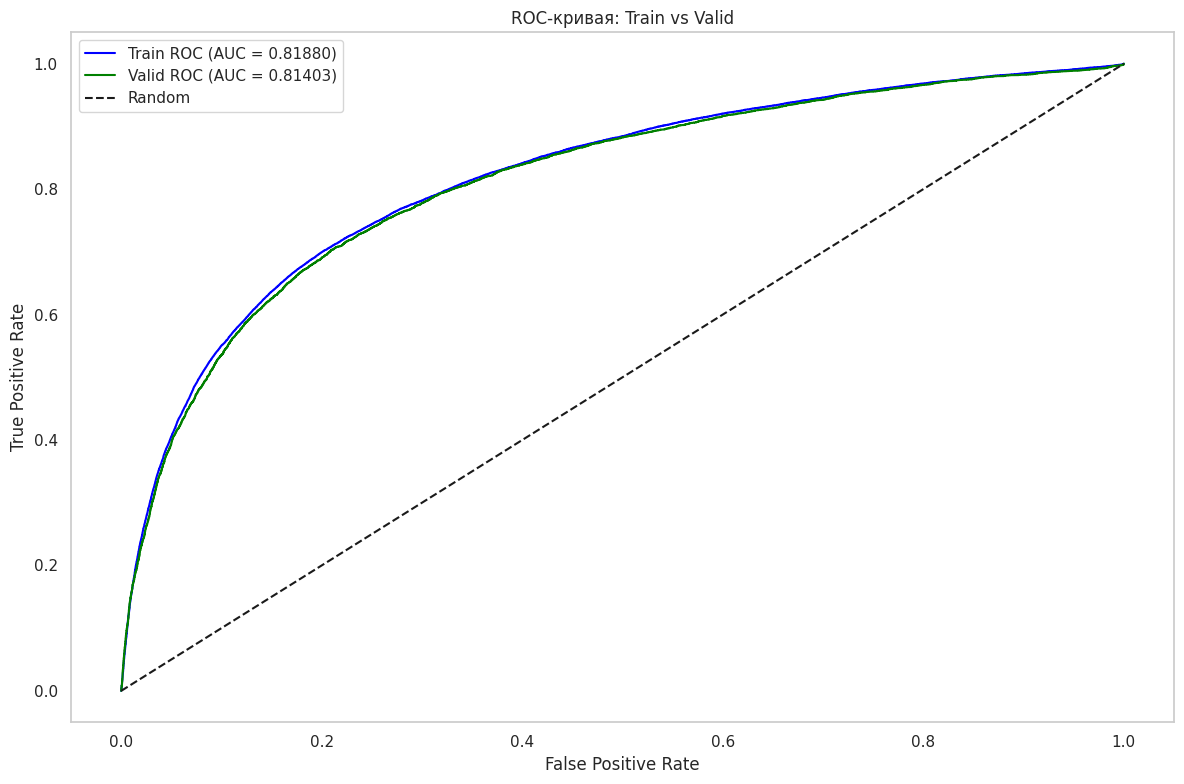

In [28]:
logreg2 = LogisticRegression(**grid.best_params_)
logreg2.fit(X_train, y_train)

res2 = show_roc_auc(logreg2)

In [29]:
# –°–æ–∑–¥–∞–¥–∏–º –î–§ –∏–∑ –º–µ—Ç—Ä–∏–∫ –º–æ–¥–µ–ª–µ–π
result = pd.DataFrame((res1, res2),
                      columns=['F1 Train', 'F1 Valid', 'AUC Train', 'AUC Valid'],
                      index=['LogisticRegression', 'LogisticRegression_GridSearchCV'])
result

F1 Train  F1 Valid  AUC Train  AUC Valid
LogisticRegression               0.578359  0.573976   0.818806   0.814037
LogisticRegression_GridSearchCV  0.578442  0.573893   0.818802   0.814033

–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –º–æ–¥–µ–ª—å LogisticRegression –ø–æ–∫–∞–∑–∞–ª–∞, –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —á–µ–º —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ penalty –∏ C.

–û–¥–Ω–∞–∫–æ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ StandardScaler –±—ã–ª–∏ –ø–æ–ª—É—á–µ–Ω—ã –ø—Ä–æ—Ç–∏–≤–æ–ø–æ–ª–æ–∂–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã (–º–æ–¥–µ–ª—å —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –≤—ã–¥–∞–ª–∞ –ª—É—á—à–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç)
|–ú–æ–¥–µ–ª—å	|F1 Valid|	AUC Valid|
|-|-|-|
|LogisticRegression|	0.573898|	0.814034|
|LogisticRegression_GridSearchCV	|0.573951|	0.814036|


### –ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å —Å —É–¥–∞–ª–µ–Ω–Ω—ã–º–∏ –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏–∑ —Ç—Ä–µ–π–Ω–∞

In [30]:
# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train_out[cat_cols])
X_valid_encoded = encoder.transform(X_valid_out[cat_cols])

# –ü–æ–ª—É—á–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –Ω–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
enc_col_names = encoder.get_feature_names_out(cat_cols)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=enc_col_names, index=X_train_out.index)
X_valid_encoded_df = pd.DataFrame(X_valid_encoded, columns=enc_col_names, index=X_valid_out.index)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
# scaler = StandardScaler()
scaler = RobustScaler()
X_train_out[num_cols] = scaler.fit_transform(X_train_out[num_cols])
X_valid_out[num_cols] = scaler.transform(X_valid_out[num_cols])

# –î–æ–±–∞–≤–ª—è–µ–º –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
X_train = pd.concat([X_train_out[num_cols], X_train_encoded_df], axis=1)
X_valid = pd.concat([X_valid_out[num_cols], X_valid_encoded_df], axis=1)

y_train = y_train_out # –ß—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –æ—Ç—Ä–∏—Å–æ—Ñ–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞

print("–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è:")
print(f"X_train: {X_train.shape}, X_test: {X_valid.shape}")

–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è:
X_train: (129791, 11), X_test: (33007, 11)


–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥: 0.2859


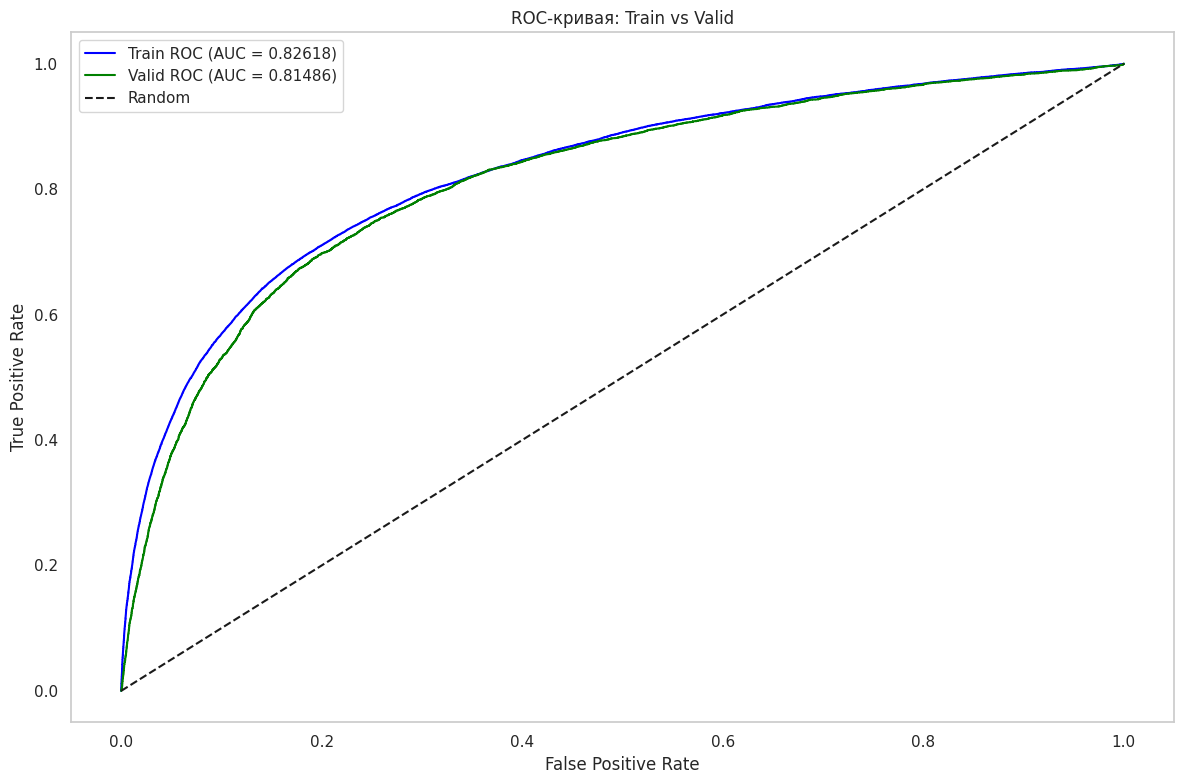

In [31]:
logreg3 = LogisticRegression()
logreg3.fit(X_train, y_train)

result.loc['LogisticRegression_outlets'] = show_roc_auc(logreg3)

In [32]:
%%time
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 5, 10],
    'solver': ['saga', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=2000),
                    params,
                    scoring='f1',
                    cv=5)

grid.fit(X_train, y_train)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", grid.best_params_)

logreg4 = LogisticRegression(**grid.best_params_)
logreg4.fit(X_train, y_train)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
CPU times: user 1min 27s, sys: 144 ms, total: 1min 28s
Wall time: 1min 36s


LogisticRegression(C=10, penalty='l1', solver='saga')

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥: 0.2862


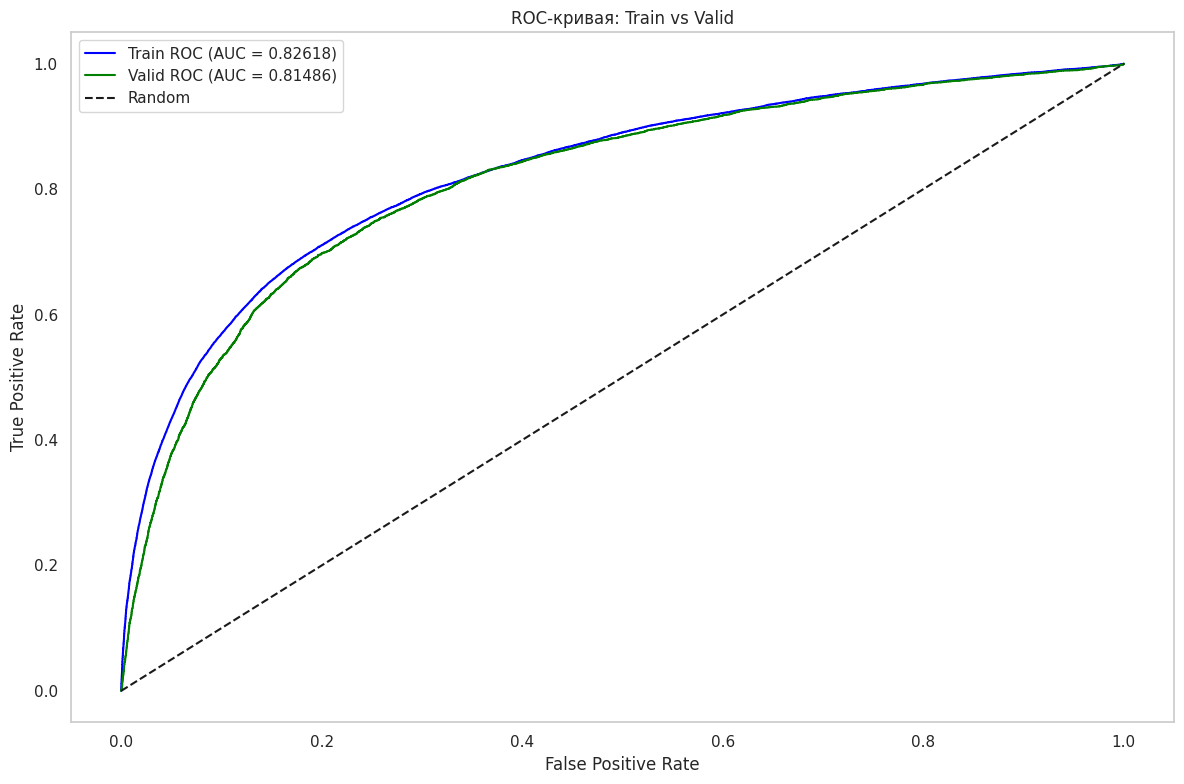

In [33]:
result.loc['LogisticRegression_outlets_GridSearchCV'] = show_roc_auc(logreg4)

In [34]:
result

F1 Train  F1 Valid  AUC Train  \
LogisticRegression                       0.578359  0.573976   0.818806   
LogisticRegression_GridSearchCV          0.578442  0.573893   0.818802   
LogisticRegression_outlets               0.590258  0.577809   0.826180   
LogisticRegression_outlets_GridSearchCV  0.590257  0.577848   0.826176   

                                         AUC Valid  
LogisticRegression                        0.814037  
LogisticRegression_GridSearchCV           0.814033  
LogisticRegression_outlets                0.814859  
LogisticRegression_outlets_GridSearchCV   0.814857

### <font color='#11a642' size='4'> –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞  –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π


In [35]:
for col in result.columns:
    print(f'–ú–µ—Ç—Ä–∏–∫–∞: {col:>10} --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: {result[col].idxmax()}')

–ú–µ—Ç—Ä–∏–∫–∞:   F1 Train --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: LogisticRegression_outlets
–ú–µ—Ç—Ä–∏–∫–∞:   F1 Valid --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: LogisticRegression_outlets_GridSearchCV
–ú–µ—Ç—Ä–∏–∫–∞:  AUC Train --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: LogisticRegression_outlets
–ú–µ—Ç—Ä–∏–∫–∞:  AUC Valid --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: LogisticRegression_outlets


# <font color='#11a642' size='4'> –í–∞—à–∏ –≤—ã–≤–æ–¥—ã
- –∫–∞–∫—É—é –∏–∑ –º–æ–¥–µ–ª–µ–π –≤—ã —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞? –ü–æ—á–µ–º—É?



–ò—Å—Ö–æ–¥—è –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º F1 –∏ AUC (–Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö), –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:

üìä –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:

|–ú–æ–¥–µ–ª—å	|F1 Valid|	AUC Valid|
|-|-|-|
|LogisticRegression|	0.573976|	0.814037|
|LogisticRegression_GridSearchCV|	0.573873|	0.814034|
|LogisticRegression_outlets|0.577809|**0.814859**|
|LogisticRegression_outlets_GridSearchCV|	**0.577811**|	0.814858|

    F1 Valid ‚Äî —Å–∞–º–∞—è –≤—ã—Å–æ–∫–∞—è —É –º–æ–¥–µ–ª–∏ LogisticRegression_outlets_GridSearchCV, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –±–æ–ª–µ–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ precision –∏ recall –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏.

    AUC Valid ‚Äî –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —É –º–æ–¥–µ–ª–∏ LogisticRegression_outlets, –Ω–æ —Å–æ–ø–æ—Å—Ç–∞–≤–∏–º—ã–π —Å –º–æ–¥–µ–ª—å—é LogisticRegression_outlets_GridSearchCV, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç –ª—É—á—à—É—é –æ–±—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Ä–∞–∑–ª–∏—á–∞—Ç—å –∫–ª–∞—Å—Å—ã.

‚öñÔ∏è –ó–∞–∫–ª—é—á–µ–Ω–∏–µ:

–ú–æ–¥–µ–ª—å LogisticRegression_outlets_GridSearchCV (–Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∏ —É–¥–∞–ª–µ–Ω—ã –≤—ã–±—Ä–æ—Å—ã, —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –±–æ–ª–µ–µ 2-—Ö –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã—Ö —Ä–∞–∑–º–∞—Ö–æ–≤ —Å –ø–æ–¥–±–æ—Ä–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ penalty –∏ C) –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞–∏–ª—É—á—à–∏–π –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É —Ç–æ—á–Ω–æ—Å—Ç—å—é –∏ –æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å—é. –î–∞–∂–µ –µ—Å–ª–∏ –ø—Ä–∏—Ä–æ—Å—Ç –∫–∞–∂–µ—Ç—Å—è –Ω–µ–±–æ–ª—å—à–∏–º, –ø—Ä–∏ –ø—Ä–æ—á–∏—Ö —Ä–∞–≤–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö –µ—ë —Å—Ç–æ–∏—Ç –ø—Ä–µ–¥–ø–æ—á–µ—Å—Ç—å –¥—Ä—É–≥–∏–º –º–æ–¥–µ–ª—è–º, —Ç.–∫. —É –Ω–µ—ë –º–µ–Ω—å—à–∏–π —Ä–∞–∑—Ä—ã–º –º–µ–∂–¥—É –º–µ—Ç—Ä–∏–∫–∞–º–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–µ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏, —Ç.–µ. –æ–Ω–∞ –º–µ–Ω–µ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∞, —á–µ–º –º–æ–¥–µ–ª—å —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é.